In [5]:
import numpy as np 
import pandas as pd 
import os
import cv2

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

In [6]:
batch_size = 40
img_height = 256
img_width = 256

In [18]:
## loading training data
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'C:/Users/purib/Downloads/archive/dataset_new/train',
    #validation_split=0.2,
    #subset= "training",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

## loading testing data
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
'C:/Users/purib/Downloads/archive/dataset_new/test',
    #validation_split=0.2,
    #subset= "validation",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

Found 2467 files belonging to 4 classes.
Found 433 files belonging to 4 classes.


In [19]:
class_names = training_ds.class_names

In [20]:
for images, labels in training_ds.take(1):
  for i in range(2):
    print(images)

tf.Tensor(
[[[[3.52910156e+01 2.32910156e+01 7.29101562e+00]
   [3.68730469e+01 2.48730469e+01 8.87304688e+00]
   [3.89101562e+01 2.64550781e+01 1.00000000e+01]
   ...
   [1.78544922e+02 1.41544922e+02 1.23544922e+02]
   [1.79000000e+02 1.42000000e+02 1.24000000e+02]
   [1.79648056e+02 1.42648056e+02 1.24648056e+02]]

  [[3.52910156e+01 2.32910156e+01 7.29101562e+00]
   [3.68730469e+01 2.50981293e+01 8.64796448e+00]
   [3.90274811e+01 2.67128906e+01 9.97683716e+00]
   ...
   [1.78404434e+02 1.41404434e+02 1.23404434e+02]
   [1.79000000e+02 1.42000000e+02 1.24000000e+02]
   [1.79000000e+02 1.42000000e+02 1.24000000e+02]]

  [[3.52910156e+01 2.32910156e+01 7.29101562e+00]
   [3.72481842e+01 2.61212311e+01 8.37513733e+00]
   [3.95993805e+01 2.76892242e+01 1.01443024e+01]
   ...
   [1.78000000e+02 1.41000000e+02 1.23000000e+02]
   [1.79000000e+02 1.42000000e+02 1.24000000e+02]
   [1.79000000e+02 1.42000000e+02 1.24000000e+02]]

  ...

  [[1.09429688e+02 7.34296875e+01 4.14296875e+01]
   [1

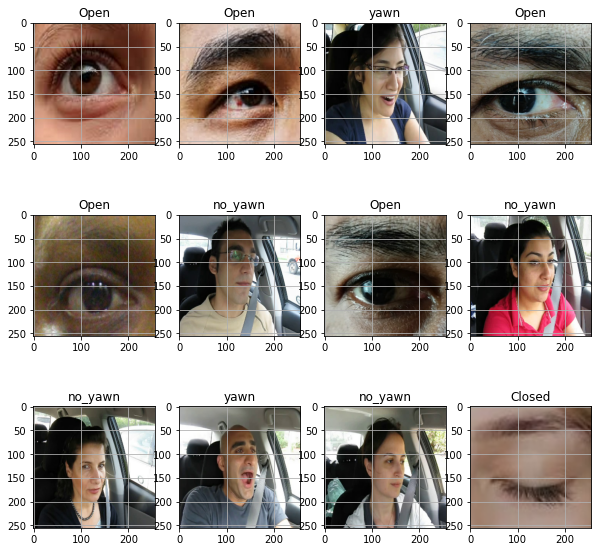

In [21]:
plt.figure(figsize=(10, 10))
for images, labels in training_ds.take(1):
  for i in range(12):
    ax = plt.subplot(3,4 , i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.grid(True)

In [22]:
## Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [23]:
## lets define our CNN
MyCnn = tf.keras.models.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),

  layers.GlobalAveragePooling2D(),
  layers.Dense(256, activation='relu'),
  layers.Dense(len(class_names), activation= 'softmax')
])

In [24]:
MyCnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
## lets train our CNN
retVal = MyCnn.fit(training_ds, validation_data= testing_ds, epochs = 10)

Epoch 1/10
62/62 [==============================] - 127s 2s/step - loss: 0.9904 - accuracy: 0.4463 - val_loss: 0.7034 - val_accuracy: 0.6236
Epoch 2/10
62/62 [==============================] - 118s 2s/step - loss: 0.7266 - accuracy: 0.5424 - val_loss: 0.7327 - val_accuracy: 0.5289
Epoch 3/10
62/62 [==============================] - 138s 2s/step - loss: 0.7033 - accuracy: 0.5764 - val_loss: 0.6906 - val_accuracy: 0.6028
Epoch 4/10
62/62 [==============================] - 123s 2s/step - loss: 0.6787 - accuracy: 0.5926 - val_loss: 0.6704 - val_accuracy: 0.6513
Epoch 5/10
62/62 [==============================] - 117s 2s/step - loss: 0.6698 - accuracy: 0.6206 - val_loss: 0.6634 - val_accuracy: 0.6236
Epoch 6/10
62/62 [==============================] - 117s 2s/step - loss: 0.6488 - accuracy: 0.6311 - val_loss: 0.6335 - val_accuracy: 0.6628
Epoch 7/10
62/62 [==============================] - 118s 2s/step - loss: 0.6263 - accuracy: 0.6587 - val_loss: 0.5999 - val_accuracy: 0.6697
Epoch 8/10
62

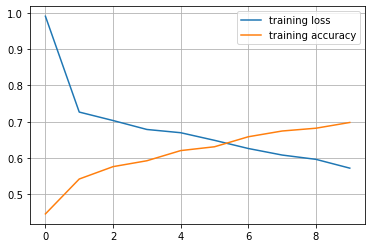

In [26]:
plt.plot(retVal.history['loss'], label = 'training loss')
plt.plot(retVal.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

In [27]:
# saving model
MyCnn.save('drowsiness-stage1.h5')

2/2 [==============================] - 1s 99ms/step


<ipython-input-28-04196b98b190>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(10, 4, i + 1)


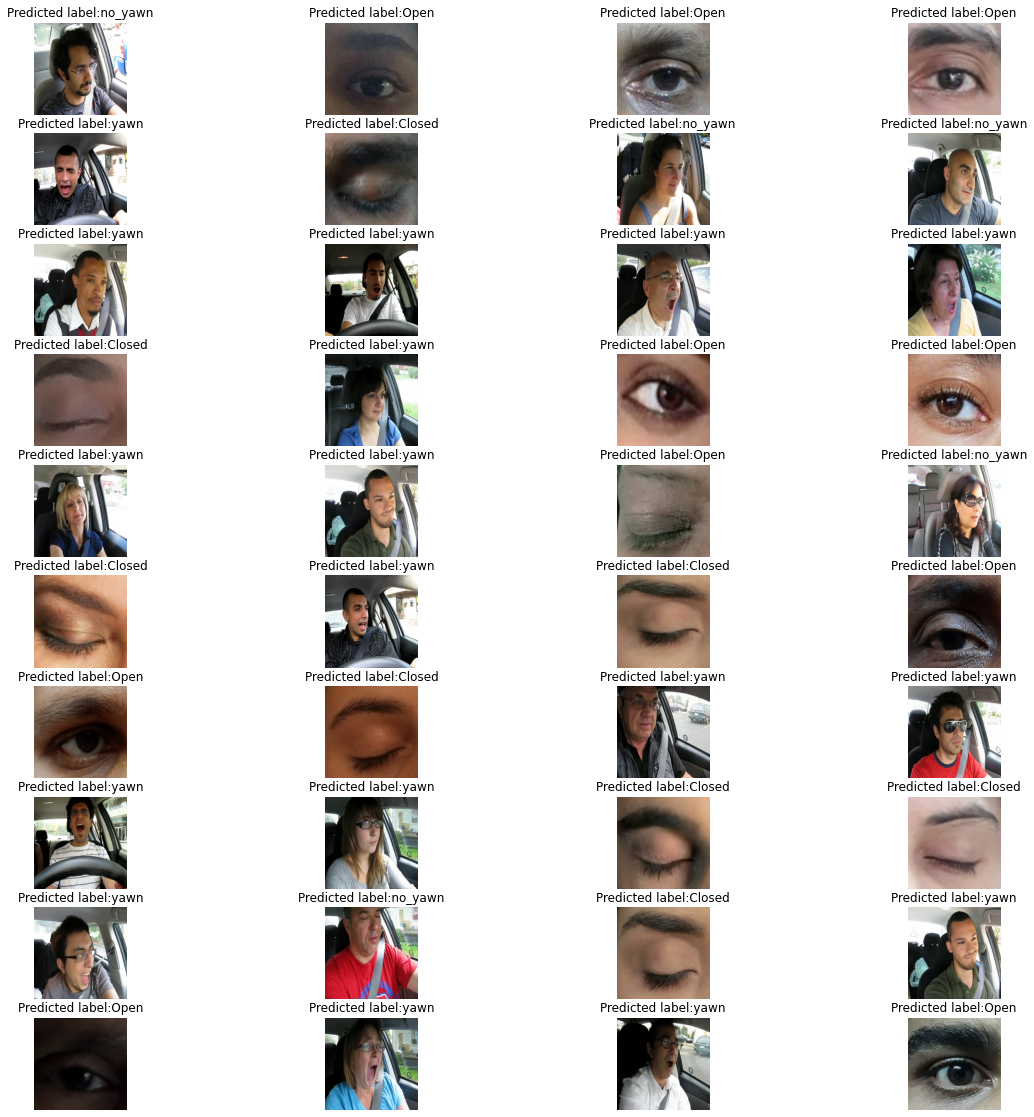

In [28]:
plt.figure(figsize=(20, 20))
for images, labels in testing_ds.take(2):
    predictions = MyCnn.predict(images)
    predlabel = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
    
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Predicted label:'+ predlabel[i])
        plt.axis('off')
        plt.grid(True)